<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic weighing

In [105]:
!wget https://raw.githubusercontent.com/EdoGitMira/Progetto_Laboratorio_Misure_pesatura_dinamica/main/dataset/with_outlier/dataset_interval_10.csv

--2021-12-21 13:55:16--  https://raw.githubusercontent.com/EdoGitMira/Progetto_Laboratorio_Misure_pesatura_dinamica/main/dataset/with_outlier/dataset_interval_10.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1030377 (1006K) [text/plain]
Saving to: ‘dataset_interval_10.csv’

dataset_interval_10 100%[===================>]   1006K  --.-KB/s    in 0.03s   

2021-12-21 13:55:16 (31.9 MB/s) - ‘dataset_interval_10.csv’ saved [1030377/1030377]



# Linear Regression

## Import packages


In [170]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Loading Data

In [171]:
data = pd.read_csv('dataset_interval_15.csv',sep=';')
print("Loaded: ",len(data))
y = data.values[:,1]
x = data.values[:,3:]
data

Loaded:  2447


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,0.940722,80,0.940730,0.013477,0.935427,0.021569,0.940303,0.021112,0.945721,0.012927,0.938694,0.025979,0.940090,0.020879,0.940427,0.011748,0.938644,0.014577,0.940047,0.024397,0.942812,0.016474,0.942359,0.013760,0.935893,0.014608,0.939340,0.021707,0.942877,0.015539,0.938288,0.011758
1,1,0.940724,80,0.940077,0.024756,0.943268,0.005650,0.934533,0.023047,0.946704,0.018088,0.937446,0.004480,0.937605,0.010351,0.944275,0.013323,0.937270,0.019181,0.944656,0.020729,0.939091,0.010738,0.937325,0.015735,0.940505,0.031187,0.946096,0.022087,0.939865,0.017763,0.933785,0.024157
2,2,0.940726,80,0.941634,0.018095,0.938966,0.028384,0.942107,0.011028,0.943610,0.012051,0.935837,0.018300,0.939952,0.011522,0.941007,0.022107,0.940626,0.021894,0.942770,0.007287,0.935990,0.023161,0.943071,0.024830,0.937905,0.009274,0.939480,0.022281,0.946412,0.019595,0.936548,0.013951
3,3,0.940727,80,0.935301,0.012728,0.947754,0.017569,0.938824,0.021227,0.941079,0.014043,0.935234,0.009662,0.943555,0.026130,0.939730,0.020153,0.942995,0.003820,0.934425,0.014796,0.945239,0.010367,0.937835,0.011671,0.945727,0.018759,0.935024,0.012918,0.939802,0.016361,0.939902,0.021049
4,4,0.940729,80,0.940253,0.016357,0.939000,0.013653,0.943905,0.017132,0.937514,0.010437,0.937546,0.009944,0.944260,0.022263,0.939666,0.016556,0.943119,0.010682,0.937015,0.013164,0.939283,0.018376,0.943615,0.014217,0.937712,0.014832,0.944335,0.020811,0.937746,0.015803,0.936749,0.017921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2442,1.231898,615,1.229530,0.036893,1.229476,0.044617,1.234846,0.033409,1.234564,0.022178,1.229082,0.030561,1.234796,0.020104,1.231502,0.020383,1.235967,0.010756,1.233168,0.019892,1.230343,0.014730,1.231871,0.007345,1.226861,0.025716,1.233268,0.026145,1.238612,0.013800,1.236581,0.017210
2443,2443,1.231903,615,1.257713,0.010969,1.219677,0.019320,1.224666,0.009432,1.270955,0.033088,1.185885,0.062578,1.261787,0.076561,1.224721,0.045746,1.236551,0.021527,1.222035,0.029265,1.233406,0.033583,1.225024,0.011758,1.244436,0.019725,1.218237,0.015248,1.237048,0.008841,1.229805,0.017821
2444,2444,1.231909,615,1.242950,0.018470,1.231553,0.012713,1.235136,0.016856,1.224613,0.006409,1.244205,0.003432,1.224207,0.010905,1.234929,0.007980,1.232769,0.012348,1.228893,0.013632,1.239870,0.008351,1.230593,0.013321,1.232486,0.009489,1.230674,0.007230,1.231340,0.005705,1.241980,0.018568
2445,2445,1.231914,615,1.231397,0.019662,1.228876,0.014563,1.233130,0.009491,1.228948,0.023482,1.232357,0.018371,1.232501,0.018045,1.235163,0.010757,1.233755,0.023539,1.234447,0.016420,1.228242,0.011705,1.234518,0.018972,1.232208,0.015902,1.234527,0.011124,1.229650,0.023326,1.235575,0.012058


# PCA

Total Variance in our dataset is:  1.4251298161675325
The 95% variance we want to have is:  1.353873325359156

Variance explain with 2 components:  1.4235818307799124
Variance explain with 5 components:  1.4241193821334908
Variance explain with 10 components:  1.4245606610289971
Variance explain with 12 components:  1.424687436479667
Variance explain with 18 components:  1.424929891530249
Variance explain with 20 components:  1.4249845288241594


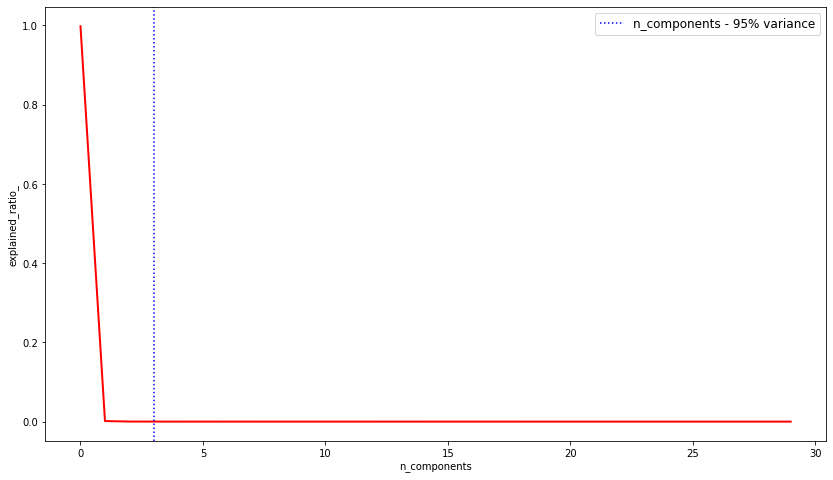

In [172]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = x.shape[1]

pca = PCA(n_components=n_components, random_state=453)
x_r = pca.fit(x).transform(x)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ",total_variance)
var_95 = total_variance*0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components),pca.explained_variance_)
a = pd.DataFrame(a,columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95 %
print("Variance explain with 2 components: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 5 components: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 10 components: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 components: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 18 components: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 20 components: ", sum(a["Explained Variance"][0:20]))



# Plotting the data
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_,linewidth=2, c='r')
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95 %
plt.axvline(3,linestyle=':', label='n_components - 95% variance',c = 'blue')
plt.legend(prop=dict(size=12))
plt.show()            
            
            

In [173]:
# Running PCA again

pca_new = PCA(n_components=3, random_state=453)
x_r = pca_new.fit(x).transform(x)

## Scree plot

In [174]:
explained_variance = pca_new.explained_variance_ratio_
explained_variance

array([9.97534974e-01, 1.37881956e-03, 1.85957383e-04])

In [175]:
import numpy as np
import plotly.express as px

In [176]:
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.997535,0.998
2,PC2,0.001379,0.999
3,PC3,0.000186,0.999


In [177]:
import plotly.graph_objects as go

fig = go.Figure()

fig = px.bar(df_explained_variance, 
             
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

## Train test and split

In [ ]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=30,train_size=0.5)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))




In [179]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1223, 30)
(1224, 30)
(1223,)
(1224,)


## Train the model

In [180]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

## Predict test results

In [181]:
y_pred = ml.predict(x_test)
print(y_pred)

[1.08590704 1.07854575 1.05480624 ... 1.07599146 0.91925626 1.08535659]


In [182]:
coefficents = ml.coef_
coefficents

array([-0.01293724,  0.68117876, -0.27324718, -0.14365794, -0.08942924,
       -0.22110653, -0.3771662 , -0.47300809,  0.14414701,  0.11632123,
        0.62212154,  0.44541039, -0.36156388,  0.09643168, -0.82393425,
        0.64106205, -0.68083222,  0.23465197, -0.40583059,  1.14879141,
        0.40295013,  0.9341034 , -0.41898783,  0.38089231,  1.16607744,
       -0.65819995,  0.48961839, -2.05582548,  0.77051349, -2.02548618])

y = β0 + β1 · x1 +  β2 · x2 + ... + βn · xn

## Evaluate the model

In [183]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2514529902093119

## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

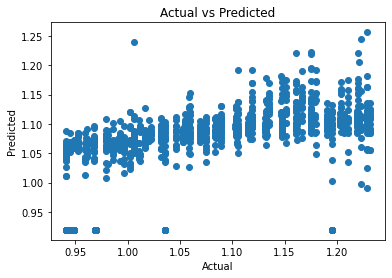

In [187]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [168]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))


0.006335198745377728
0.07959396173942926


In [169]:
#Example on R_Square and Adjusted R Square
import statsmodels.api as sm
X_addC = sm.add_constant(y_test)
result = sm.OLS(y_pred, X_addC).fit()
print(result.rsquared, result.rsquared_adj)


0.26260019226469533 0.261996755433488
